## Data process

## Load data and print head

In [1240]:
import pandas as pd
import numpy as np
import math
df_11=pd.read_csv('https://raw.githubusercontent.com/moyifang/Movie_Recomemdation/main/ratings_hm_11.csv',delimiter=",", encoding = "ISO-8859-1")
df_25=pd.read_csv('https://raw.githubusercontent.com/moyifang/Movie_Recomemdation/main/ratings_hm_25.csv',delimiter=",", encoding = "ISO-8859-1")
df_50=pd.read_csv('https://raw.githubusercontent.com/moyifang/Movie_Recomemdation/main/ratings_hm_50.csv',delimiter=",", encoding = "ISO-8859-1")
df_93=pd.read_csv('https://raw.githubusercontent.com/moyifang/Movie_Recomemdation/main/ratings_hm_93.csv',delimiter=",", encoding = "ISO-8859-1")

In [1241]:
df_50.head()

,Unnamed: 0,userId,movieId,rating,genres
0,0,1,1,3,Comedy
1,1,1,3,4,Drama|Thriller
2,2,1,7,4,Adventure|Fantasy|Sci-Fi
3,3,1,8,4,Horror
4,4,1,9,2,Comedy


In [1242]:
df_11.head()

,Unnamed: 0,userId,movieId,rating,genres
0,0,1,6,4,Action|Sci-Fi|Thriller
1,1,1,14,4,Action|Thriller
2,2,1,22,4,Action|Adventure|Sci-Fi|Thriller
3,3,1,23,3,Action|Adventure|Crime|Drama
4,4,1,30,4,Comedy|Fantasy


In [1243]:
'''movie_id = df_11.movieId.value_counts()
user_id = df_11.userId.value_counts()
print(len(movie_id))
print(len(user_id))
print(len(df_11.userId))'''

'movie_id = df_11.movieId.value_counts()\nuser_id = df_11.userId.value_counts()\nprint(len(movie_id))\nprint(len(user_id))\nprint(len(df_11.userId))'

In [1244]:
'''def max_eval_movies(data):
    moviefreq = data.movieId.value_counts() # 统计每部电影的评分人数，可看出电影的流行程度，默认是降序排列
    print(moviefreq.count())
    sorted_byfreq = data.loc[moviefreq.index] # 根据频次大小依次取电影信息
    sorted_byfreq['ranking']=range(moviefreq.count()) # 加上排名
    sorted_byfreq['freq']=moviefreq # 加上频次
    print(sorted_byfreq.iloc[0:10]) # 前十大流行电影'''

"def max_eval_movies(data):\n    moviefreq = data.movieId.value_counts() # 统计每部电影的评分人数，可看出电影的流行程度，默认是降序排列\n    print(moviefreq.count())\n    sorted_byfreq = data.loc[moviefreq.index] # 根据频次大小依次取电影信息\n    sorted_byfreq['ranking']=range(moviefreq.count()) # 加上排名\n    sorted_byfreq['freq']=moviefreq # 加上频次\n    print(sorted_byfreq.iloc[0:10]) # 前十大流行电影"

In [1245]:
max_eval_movies(df_11)

300
    Unnamed: 0  userId  movieId  rating                        genres  \
3            3       1       23       3  Action|Adventure|Crime|Drama   
7            7       1       68       3                  Action|Drama   
13          13       1      174       4               Action|Thriller   
1            1       1       14       4               Action|Thriller   
49          49       2      178       5                    Sci-Fi|War   
24          24       1      274       4                        Comedy   
6            6       1       43       4        Adventure|Comedy|Drama   
9            9       1      127       3                Comedy|Western   
43          43       2      123       3        Drama|Romance|Thriller   
14          14       1      176       5                 Drama|Romance   

    ranking  freq  
3         0    58  
7         1    52  
13        2    52  
1         3    51  
49        4    51  
24        5    49  
6         6    48  
9         7    48  
43        8 

In [1246]:
'''import matplotlib.pyplot as plt
def rating_times(data):
    moviefreq1 =  data.movieId.value_counts().copy()
    moviefreq1.index = range(moviefreq1.count()) # 对索引重新赋值，方便画图
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    moviefreq1.plot(ax=ax, title='Rating times')'''

"import matplotlib.pyplot as plt\ndef rating_times(data):\n    moviefreq1 =  data.movieId.value_counts().copy()\n    moviefreq1.index = range(moviefreq1.count()) # 对索引重新赋值，方便画图\n    fig, ax = plt.subplots(1, 1, figsize=(12, 4))\n    moviefreq1.plot(ax=ax, title='Rating times')"

In [1247]:
'''rating_times(df_11)
rating_times(df_25)'''

'rating_times(df_11)\nrating_times(df_25)'

In [1248]:
'''max_eval_movies(df_25)'''

'max_eval_movies(df_25)'

In [1249]:
'''meanrating = df_11['rating'].groupby(df_11['movieId']).mean()
meanrating_user =  df_11['rating'].groupby(df_11['userId']).mean()
meanrating_o = meanrating.sort_values(ascending = False)
print(meanrating_user.sort_values(ascending = False))
print(meanrating_o)'''

"meanrating = df_11['rating'].groupby(df_11['movieId']).mean()\nmeanrating_user =  df_11['rating'].groupby(df_11['userId']).mean()\nmeanrating_o = meanrating.sort_values(ascending = False)\nprint(meanrating_user.sort_values(ascending = False))\nprint(meanrating_o)"

In [1250]:
'''sorted_byrate = df_11.loc[meanrating.index] # 根据频次大小依次取电影信息
sorted_byrate['ranking']=range(meanrating.count()) # 加上排名
sorted_byrate['rating']=meanrating # 加上评分
moviefreq = df_11.movieId.value_counts()
sorted_byrate['freq']=moviefreq.loc[meanrating.index] # 加上评分个数
sorted_byrate.iloc[0:10] # 前十大流行电影'''

"sorted_byrate = df_11.loc[meanrating.index] # 根据频次大小依次取电影信息\nsorted_byrate['ranking']=range(meanrating.count()) # 加上排名\nsorted_byrate['rating']=meanrating # 加上评分\nmoviefreq = df_11.movieId.value_counts()\nsorted_byrate['freq']=moviefreq.loc[meanrating.index] # 加上评分个数\nsorted_byrate.iloc[0:10] # 前十大流行电影"

In [1251]:
'''fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.scatter(sorted_byrate['freq'],sorted_byrate['rating'])'''

"fig, ax = plt.subplots(1, 1, figsize=(12, 4))\nax.scatter(sorted_byrate['freq'],sorted_byrate['rating'])"

## get the genre of every movie

In [1252]:
'''genreslist = [] # 存储为所有电影标注的基因
genreseries = df_11.genres.str.split(pat = "|")
genrecount = genreseries.count()
for i in range(genrecount):
    genreslist.extend(genreseries.iloc[i]) # 把 Series 中的所有元素展平组成一个 list

allmoviegenres = pd.Series(genreslist)
print(allmoviegenres)
genrestats = allmoviegenres.value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
genrestats.plot(ax=ax, kind='bar', title='freq')'''

'genreslist = [] # 存储为所有电影标注的基因\ngenreseries = df_11.genres.str.split(pat = "|")\ngenrecount = genreseries.count()\nfor i in range(genrecount):\n    genreslist.extend(genreseries.iloc[i]) # 把 Series 中的所有元素展平组成一个 list\n\nallmoviegenres = pd.Series(genreslist)\nprint(allmoviegenres)\ngenrestats = allmoviegenres.value_counts()\nfig, ax = plt.subplots(1, 1, figsize=(15, 4))\ngenrestats.plot(ax=ax, kind=\'bar\', title=\'freq\')'

In [1253]:
'''genreslist = [] # 存储为所有电影标注的基因
genreseries = df_25.genres.str.split(pat = "|")
genrecount = genreseries.count()
for i in range(genrecount):
    genreslist.extend(genreseries.iloc[i]) # transfer the series to list
len(genreslist)
print(len(genreslist))
allmoviegenres = pd.Series(genreslist)
genrestats = allmoviegenres.value_counts()
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
genrestats.plot(ax=ax, kind='bar', title='freq')'''

'genreslist = [] # 存储为所有电影标注的基因\ngenreseries = df_25.genres.str.split(pat = "|")\ngenrecount = genreseries.count()\nfor i in range(genrecount):\n    genreslist.extend(genreseries.iloc[i]) # transfer the series to list\nlen(genreslist)\nprint(len(genreslist))\nallmoviegenres = pd.Series(genreslist)\ngenrestats = allmoviegenres.value_counts()\nfig, ax = plt.subplots(1, 1, figsize=(15, 4))\ngenrestats.plot(ax=ax, kind=\'bar\', title=\'freq\')'

In [1254]:
df_data = df_50
df_data.head()
meanrating_movie = df_data['rating'].groupby(df_data['movieId']).mean()
meanrating_user =  df_data['rating'].groupby(df_data['userId']).mean()



## Check the datatypes of each column 

In [1255]:
def get_list_index_map(list):
    """
    transfrom list to dictionary
    :param list: input list
    :return:
    1. map item:index
    2. map_reverse index:item
    """
    map = {}
    map_reverse = {}
    for i in range(len(list)):
        map[list[i]] = i
        map_reverse[i] = list[i]
    return map, map_reverse

def get_type_list(data):
    """
    get all the genres
    :return: list for all the genres
    """
    genres_list = data['genres'].values.tolist()
    type_list = []
    for item in genres_list:
        movie_types = item.split('|')
        for movie_type in movie_types:
            if movie_type not in type_list and movie_type != '(no genres listed)':
                type_list.append(movie_type)
    return type_list

# turn to list

user_list = df_data['userId'].drop_duplicates().values.tolist()
movie_list = df_data['movieId'].drop_duplicates().values.tolist()
genres_list = df_data['genres'].values.tolist()
type_list = get_type_list(df_data)
type_map, type_map_reverse = get_list_index_map(type_list)
user_map, user_map_reverse = get_list_index_map(user_list)
movie_map, movie_map_reverse = get_list_index_map(movie_list)
    #, user_map_reverse,movie_map, movie_map_reverse
# 获得原index-数组index的map，便于后续处理

In [1256]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
def get_rating_matrix(data):
    """
    matrix for rating
    :return: 2*2 matrix,M[i,j]represnet the rating of movie_j from user_i,missing vlaue = 0
    """
    matrix = np.zeros((len(user_map.keys()), len(movie_map.keys())))
    for row in data.itertuples(index=True):
        user = user_map[getattr(row, "userId")]
        movie = movie_map[getattr(row, "movieId")]
        rate = getattr(row, "rating")
        matrix[user, movie] = rate
    return matrix
ratings_matrix = get_rating_matrix(df_data)    
print(ratings_matrix)

[[3. 4. 4. ... 0. 0. 0.]
 [4. 4. 3. ... 0. 0. 0.]
 [3. 0. 3. ... 0. 0. 0.]
 ...
 [5. 5. 0. ... 2. 1. 0.]
 [0. 5. 4. ... 5. 3. 4.]
 [4. 5. 0. ... 0. 0. 0.]]


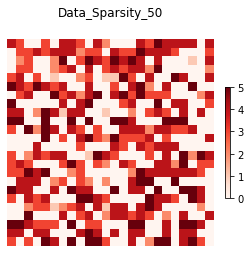

In [1257]:
A = ratings_matrix[1:25,1:25]
ax = plt.matshow(A,cmap=plt.cm.Reds,)
figsize=(14, 14)
plt.colorbar(ax.colorbar, fraction=0.025)
plt.axis('off') 
plt.title("Data_Sparsity_50",fontsize=12)
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

In [1258]:
def get_user_sim_matrix(input_matrix):
    """
    build the simlirity tast matrix for users
    :param input_matrix: input matrix, and row[i] represnet the eigenvectpr of user[i]
    :return: sysmmetric matrix, M[i,j]=M[j,i]=sim(user_i,user_j)
    """
    size = len(input_matrix)
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(i + 1, size):
            sim = cosine_similarity(input_matrix[i], input_matrix[j])
            # i row of matrix: movie ranks from user i 
            # sim = 1
            matrix[i, j] = sim
            matrix[j, i] = sim  # 对称矩阵，对角线为0
    return matrix


def cosine_similarity(list1, list2):
    """
    :param list1: eigen_vector for user[1]
    :param list2: eigen_vector for user[2]
    :return: the cosine similarity for 2 vectors
    """
    res = 0
    d1 = 0
    d2 = 0
    list1_n=[]
    list2_n=[]
    for index in range(len(list1)):
        if list1[index] != 0 and list2[index]!= 0: 
            list1_n.append(list1[index])
            list2_n.append(list2[index])
    if len(list1_n)>4:
        for index in range(len(list1_n)):
            val1 = list1_n[index]-3
            val2 = list2_n[index]-3
            # for (val1, val2) in zip(list1_n, list2_n):
            res += val1 * val2
            d1 += val1 ** 2
            d2 += val2 ** 2
        return res / (math.sqrt(d1 * d2))
    else:
        return 0
ratings_matrix = get_rating_matrix(df_data)
ratings_matrix_n = min_max_scaler.fit_transform(get_rating_matrix(df_data))
user_sim_matrix = get_user_sim_matrix(ratings_matrix)
np.savetxt('user_sim_matrix.csv', user_sim_matrix, delimiter = ',')

In [1259]:
def Pearson_user_sim_matrix(input_matrix):
    """
    build the simlirity tast matrix for users
    :param input_matrix: input matrix, and row[i] represnet the eigenvectpr of user[i]
    :return: sysmmetric matrix, M[i,j]=M[j,i]=sim(user_i,user_j)
    """
    size = len(input_matrix)
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(i + 1, size):
            sim = pearson_similarity(input_matrix[i], input_matrix[j])
            # i row of matrix: movie ranks from user i 
            # sim = 1
            matrix[i, j] = sim
            matrix[j, i] = sim  # 对称矩阵，对角线为0
    return matrix

from numpy import *

def pearson_similarity(list1, list2):
    """
    :param list1: eigen_vector for user[1]
    :param list2: eigen_vector for user[2]
    :return: the cosine similarity for 2 vectors
    """
    res = 0
    d1 = 0
    d2 = 0
    list1_n=[]
    list2_n=[]
    for item in range(len(list1)):
        if list1[item] != 0 and list2[item]!= 0: 
            list1_n.append(list1[item])
            list2_n.append(list2[item])
    if len(list1_n)>4:
        list1 = [x for x in list1 if x!=0]
        list2 = [x for x in list2 if x!=0]
        for index in range(len(list1_n)):
            val1 = list1_n[index] - mean(list1)
            val2 = list2_n[index] - mean(list2)
            # for (val1, val2) in zip(list1_n, list2_n):
            res += val1 * val2
            d1 += val1 ** 2
            d2 += val2 ** 2
        return res / (math.sqrt(d1 * d2))
    else:
        return 0
ratings_matrix = get_rating_matrix(df_data)
pearson_user_sim_matrix = Pearson_user_sim_matrix(ratings_matrix)
np.savetxt('pearson_user_sim_matrix.csv', pearson_user_sim_matrix, delimiter = ',')



In [1260]:
def Pearson_movie_sim_matrix(input_matrix):
    """
    build the simlirity tast matrix for users
    :param input_matrix: input matrix, and row[i] represnet the eigenvectpr of user[i]
    :return: sysmmetric matrix, M[i,j]=M[j,i]=sim(user_i,user_j)
    """
    size = len(input_matrix)
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(i + 1, size):
            sim = pearson_similarity(input_matrix[:,i], input_matrix[:,j])
            # i row of matrix: movie ranks from user i 
            # sim = 1
            matrix[i, j] = sim
            matrix[j, i] = sim  # 对称矩阵，对角线为0
    return matrix

from numpy import *

def pearson_similarity(list1, list2):
    """
    :param list1: eigen_vector for user[1]
    :param list2: eigen_vector for user[2]
    :return: the cosine similarity for 2 vectors
    """
    res = 0
    d1 = 0
    d2 = 0
    list1_n=[]
    list2_n=[]
    for item in range(len(list1)):
        if list1[item] != 0 and list2[item]!= 0: 
            list1_n.append(list1[item])
            list2_n.append(list2[item])
    if len(list1_n)>4:
        list1 = [x for x in list1 if x!=0]
        list2 = [x for x in list2 if x!=0]
        for index in range(len(list1_n)):
            val1 = list1_n[index] - mean(list1)
            val2 = list2_n[index] - mean(list2)
            # for (val1, val2) in zip(list1_n, list2_n):
            res += val1 * val2
            d1 += val1 ** 2
            d2 += val2 ** 2
        return res / (math.sqrt(d1 * d2))
    else:
        return 0
ratings_matrix = get_rating_matrix(df_data)
pearson_movie_sim_matrix = Pearson_movie_sim_matrix(ratings_matrix)
np.savetxt('pearson_movie_sim_matrix.csv', pearson_movie_sim_matrix, delimiter = ',')



In [1261]:
import matplotlib.pyplot as plt  
def get_K(sim_mat, min_similarity=0.5):
    num = np.sum(abs(sim_mat[:,1:])>min_similarity, axis=1) #统计用户大于min_similarity的评分数
    
    # 画图 
    plt.hist(num, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel(u"user_num/movie_number")
    plt.ylabel(u"Frequency")
    plt.title(u"user_num/movie_number-Frequency distribution hist Histogram")
    plt.show()
    
    num_sort = np.sort(-num)
    line = int(0.8*len(sim_mat))
    K = -1*num_sort[line]
    return K

In [1262]:
sim_mat=np.loadtxt(open("./pearson_movie_sim_matrix.csv", "rb"), delimiter=",")
num = np.sum(abs(sim_mat[:,1:])>0.5, axis=1)
num_sort = np.sort(-num)
line = int(len(sim_mat))
K = -1*num_sort[line-1]
print(num_sort)
print(line)
print(K)

[-15 -14 -13 -13 -13 -13 -12 -11 -11 -11 -11 -10 -10 -10 -10 -10 -10 -10
  -9  -9  -9  -9  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -7  -7  -7  -7
  -7  -7  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -5  -5
  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -4  -4  -4  -4  -4  -4  -4
  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -3  -3  -3
  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -2  -2  -2  -2  -2  -2  -2
  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   0   0   0
   0   0   0   0   0   0]
150
0


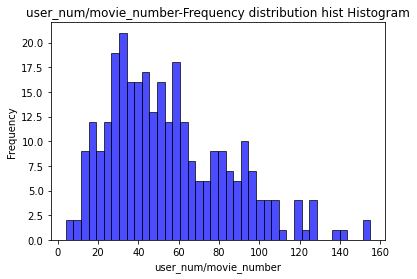

min_similarity: 0.5 K: 28


In [1263]:
sim_mat=np.loadtxt(open("./movie_sim_matrix.csv", "rb"), delimiter=",")
min_similarity = 0.5
K = get_K(sim_mat, min_similarity=min_similarity)
print('min_similarity:',min_similarity,'K:',K)

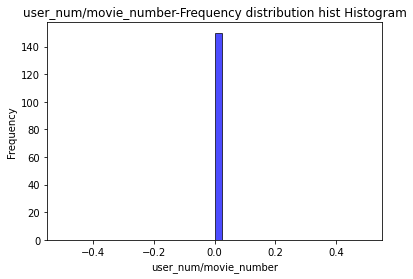

min_similarity: 0.8 K: 0


In [1264]:
sim_mat=np.loadtxt(open("./pearson_user_sim_matrix.csv", "rb"), delimiter=",")
min_similarity = 0.8
K = get_K(sim_mat, min_similarity=min_similarity)
print('min_similarity:',min_similarity,'K:',K)

KNN

In [1265]:
def k_neighbor(matrix, index,movie, k):
    """
    输入相似矩阵，读取k邻居的index
    :param matrix: 相似矩阵
    :param index: target index
    :param k:
    :return: list([k-index, similarity],....)
    """
    tmp = []
    line = matrix[index]
    if ratings_matrix[index,movie] != 0:
        for i in range(len(line)):
            tmp.append([i, line[i]])
    else:
        tmp = [[index,0] for i in range(k)]
    tmp.sort(key=lambda val: abs(val[1]), reverse=True)
    return tmp[:k]

In [1266]:
if True:
    def get_predict(matrix, index, k):
        """
        获取预测评分
        :param matrix: 相似矩阵
        :param index: 目标index
        :param k:k邻居的k
        :return: 根据KNN，获得对第index位用户评分的预测
        """ 
        ratings_matrix = get_rating_matrix(df_data)
        R = []
        for movie in range(len(ratings_matrix[0])):
            neighbors = k_neighbor(matrix, index, movie, k)
            all_sim = 0
            rate = 0

            for pair in neighbors:
                neighbor_index = pair[0]
                neighbor_sim = pair[1]
                r = ratings_matrix[neighbor_index,movie]
                rate += (r-meanrating_user.values[neighbor_index])* neighbor_sim 
                all_sim += neighbor_sim
            rate /= all_sim+0.00001
            rate = rate + meanrating_user.values[index]
            R.append(rate)
        return R

In [1267]:
if True:
    def get_movie_predict(matrix, index, k):
        """
        获取预测评分
        :param matrix: 相似矩阵
        :param index: 目标index
        :param k:k邻居的k
        :return: 根据KNN，获得对第index位用户评分的预测
        """ 
        ratings_matrix = get_rating_matrix(df_data)
        R = []
        for movie in range(len(ratings_matrix[0])):
            neighbors = k_neighbor(matrix, index, movie, k)
            all_sim = 0
            rate = 0

            for pair in neighbors:
                neighbor_index = pair[0]
                neighbor_sim = pair[1]
                r = ratings_matrix[neighbor_index,movie]
                rate += (r-meanrating_movie.values[neighbor_index])* neighbor_sim 
                all_sim += neighbor_sim
            rate /= all_sim+0.00001
            rate = rate + meanrating_movie.values[index]
            R.append(rate)
        return R

In [1268]:
def get_CFRecommend(matrix, index, k, n):
    """
    获取推荐
    :param matrix: sim matrix
    :param index: goal index
    :param k: K-neibourgh 
    :param n: the topN for recommendation
    :return: list([movie_index,rating],...)
    """
    rate = get_predict(matrix, index, k)  # 获取预测评分
    for i in range(len(rate)):  # 如果用户已经评分过了，把预测评分设为0，也就是不会再推荐看过的电影
        if ratings_matrix[index][i] != 0:
            rate[i] = 0
    res = []
    for i in range(len(rate)):
        res.append([i, rate[i]])
    res.sort(key=lambda val: val[1], reverse=True)
    return res[:n]


In [1269]:
def get_movie_CFRecommend(matrix, index, k, n):
    """
    获取推荐
    :param matrix: sim matrix
    :param index: goal index
    :param k: K-neibourgh 
    :param n: the topN for recommendation
    :return: list([movie_index,rating],...)
    """
    rate = get_movie_predict(matrix, index, k)  # 获取预测评分
    for i in range(len(rate)):  # 如果用户已经评分过了，把预测评分设为0，也就是不会再推荐看过的电影
        if ratings_matrix[index][i] != 0:
            rate[i] = 0
    res = []
    for i in range(len(rate)):
        res.append([i, rate[i]])
    res.sort(key=lambda val: val[1], reverse=True)
    return res[:n]

## Line-plot temperatures (in a single chart) and bar-plot humidity parameters 

In [1270]:
def type_rank_map():
    """
    compute the rank of movies for different types
    :return: map{'type':[(movie_id,mean_rating,rating numbers),...],...}
    """
    map = {}
    for t in type_list:
        map[t] = []
    for movie in range(len(movie_list)):
        print('Processing Movie', movie)
        # compute the mean rating of the movie i
        rates = np.array(ratings_matrix)[:, movie]
        count = 0
        rate = 0
        for r in rates:
            if r != 0:
                rate += r
                count += 1
        if count != 0:  # in case of divide by 0
            rate = rate / count
        # 将(电影,评分,评分人数)加到对应的map中
        types = genres_list[movie].split('|')
        for t in types:
            map[t].append((movie, rate, count))
    # order by the mean rating, order by the rate numbers if the movies have same mean_rating
    for t in type_list:
        temp = map[t]
        temp.sort(key=lambda val: (val[1], val[2]), reverse=True)
        map[t] = temp
    return map

type_rank_map = type_rank_map()
import json
with open('type_rank_map.json','w') as file_obj:
    json.dump(type_rank_map,file_obj)


Processing Movie 0
Processing Movie 1
Processing Movie 2
Processing Movie 3
Processing Movie 4
Processing Movie 5
Processing Movie 6
Processing Movie 7
Processing Movie 8
Processing Movie 9
Processing Movie 10
Processing Movie 11
Processing Movie 12
Processing Movie 13
Processing Movie 14
Processing Movie 15
Processing Movie 16
Processing Movie 17
Processing Movie 18
Processing Movie 19
Processing Movie 20
Processing Movie 21
Processing Movie 22
Processing Movie 23
Processing Movie 24
Processing Movie 25
Processing Movie 26
Processing Movie 27
Processing Movie 28
Processing Movie 29
Processing Movie 30
Processing Movie 31
Processing Movie 32
Processing Movie 33
Processing Movie 34
Processing Movie 35
Processing Movie 36
Processing Movie 37
Processing Movie 38
Processing Movie 39
Processing Movie 40
Processing Movie 41
Processing Movie 42
Processing Movie 43
Processing Movie 44
Processing Movie 45
Processing Movie 46
Processing Movie 47
Processing Movie 48
Processing Movie 49
Processing

In [1271]:
def get_user_favor_matrix():
    """
    构造用户偏好矩阵
    :return: [i,j]表示用户i对第j类型电影的喜爱程度
    """
    matrix = np.zeros((len(user_list), len(type_list)))
    for user in range((len(user_list))):
        weight = 0
        rating = ratings_matrix[user]
        for movie in range(len(rating)):
            if rating[movie] != 0:
                # update favor
                types = genres_list[movie].split('|')
                for t in types:
                    if t in type_map.keys():
                        matrix[user][type_map[t]] += rating[movie]
                        weight += rating[movie]
        matrix[user] /= weight
    return matrix


In [1272]:
user_favor_matrix = get_user_favor_matrix()
print(np.shape(user_favor_matrix))
pd.DataFrame(user_favor_matrix).head(10)

(150, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.170181,0.138554,0.112952,0.054217,0.030120,0.058735,0.025602,0.036145,0.055723,0.034639,0.100904,0.081325,0.027108,0.019578,0.042169,0.012048,0.0
1,0.222789,0.178571,0.103741,0.011905,0.017007,0.023810,0.018707,0.061224,0.068027,0.042517,0.102041,0.030612,0.034014,0.013605,0.057823,0.013605,0.0
2,0.218241,0.151466,0.089577,0.040717,0.026059,0.019544,0.014658,0.052117,0.073290,0.043974,0.128664,0.055375,0.016287,0.035831,0.027687,0.006515,0.0
3,0.179878,0.146341,0.105183,0.051829,0.019817,0.036585,0.022866,0.044207,0.062500,0.050305,0.097561,0.076220,0.044207,0.021341,0.041159,0.000000,0.0
4,0.134686,0.143911,0.112546,0.057196,0.022140,0.053506,0.016605,0.036900,0.060886,0.036900,0.097786,0.090406,0.044280,0.036900,0.049815,0.005535,0.0
5,0.145340,0.150079,0.123223,0.050553,0.031596,0.053712,0.014218,0.037915,0.045814,0.044234,0.107425,0.074250,0.048973,0.011058,0.048973,0.012638,0.0
6,0.177347,0.163934,0.126677,0.038748,0.020864,0.040238,0.034277,0.025335,0.031297,0.023845,0.098361,0.074516,0.041729,0.028316,0.062593,0.011923,0.0
7,0.183502,0.173401,0.132997,0.031987,0.015152,0.037037,0.006734,0.035354,0.055556,0.035354,0.104377,0.053872,0.031987,0.030303,0.060606,0.011785,0.0
8,0.152905,0.181957,0.126911,0.029052,0.015291,0.056575,0.021407,0.039755,0.045872,0.027523,0.125382,0.051988,0.039755,0.024465,0.047401,0.013761,0.0
9,0.209709,0.128155,0.081553,0.064078,0.034951,0.052427,0.027184,0.042718,0.069903,0.033010,0.104854,0.062136,0.036893,0.003883,0.036893,0.011650,0.0


In [1273]:
def get_CBRecommend(user_index, user_favor, type_rank, threshold=10):
    """
    reccomendation based on contents(genres), only recommend the top1 movie
    :param user_index: Target users
    :param user_favor: favorite matric for users
    :param type_rank: sorting map of different types of movies
    :param threshold: At least a threshold personal score is valid
    :return: list([movie_index,mean rating, rating number],...)
    """
    favors = user_favor[user_index]
    max_val = 0
    index = []  # 考虑如果有多个类型都一样喜欢，那么就挑可选出的评分最高的
    for i in range(len(favors)):
        if max_val != 0 and favors[i] == max_val:
            index.append(i)
        elif favors[i] > max_val:
            max_val = favors[i]
            index = [i]
    candidate = []
    for i in index:
        tmp = type_rank[type_map_reverse[i]]  # 获取到该类排名list
        for movie in tmp:
            if movie[2] > threshold and ratings_matrix[user_index][movie[0]] != 0:
                # 必须满足评分人数>threshold且用户没有看过
                candidate.append(movie)
                break
    # 排序，选择最优的
    candidate.sort(key=lambda val: (val[1], val[2]))
    return candidate[0]


In [1274]:
if __name__ == '__main__':
    output = [['userId', 'movie']]
    user_sim_matrix_by_rating = np.loadtxt(open("./pearson_user_sim_matrix.csv", "rb"), delimiter=",")
    for user in user_list:
        res1 = get_CFRecommend(user_sim_matrix_by_rating, user_map[user], 4, 10)[0:5]
        output.append([user, res1])
    np.savetxt('movie_CF.csv', output, delimiter=',', fmt="%s")

for user in user_list:
    res1 = get_CFRecommend(user_sim_matrix_by_rating, 1, 4, 10)[0:5]
print(res1)

d:\Programs\Python\Python39\lib\site-packages\numpy\lib\npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


[[3, 3.5365853658536586], [4, 3.5365853658536586], [6, 3.5365853658536586], [10, 3.5365853658536586], [13, 3.5365853658536586]]


In [1275]:
if __name__ == '__main__':
    output = [['userId', 'movie']]
    movie_sim_matrix_by_rating = np.loadtxt(open("./pearson_movie_sim_matrix.csv", "rb"), delimiter=",")
    for user in user_list:
        res1 = get_movie_CFRecommend(movie_sim_matrix_by_rating, user_map[user], 4, 10)[0:5]
        output.append([user, res1])
    np.savetxt('movie_CF_m.csv', output, delimiter=',', fmt="%s")

for user in user_list:
    res1 = get_movie_CFRecommend(movie_sim_matrix_by_rating, 1, 4, 10)[0:5]
print(res1)

[[3, 3.6823529411764704], [4, 3.6823529411764704], [6, 3.6823529411764704], [10, 3.6823529411764704], [13, 3.6823529411764704]]


In [1276]:
if __name__ == '__main__':
    output = [['userId', 'movieId']]
    user_sim_matrix_by_rating = np.loadtxt(open("./user_sim_matrix.csv", "rb"), delimiter=",")
    for user in user_list:
        res2 = get_CBRecommend(user_map[user], user_favor_matrix, type_rank_map)
        output.append([user, res2[0:5]])
    np.savetxt('movie_CB.csv', output, delimiter=',', fmt="%s")

In [1277]:
def evaluation(matrix, K):
    """
    评估推荐模型准确度
    :param user_sim_matrix: 用户相似度矩阵
    :param split: 测试集比例
    :return: RMSE计算结果
    """
    n = 0
    res = 0
    R = 0
    split=0.2
    user_start = int(len(user_list) * (1 - split))
    movie_start = int(len(movie_list) * (1 - split))
    cover = {}  # 计算覆盖率，标记推荐的电影列表
    for user_index in range(user_start, len(user_list)):
        predict = get_predict(matrix, user_index, K)
        for movie_index in range(movie_start, len(movie_list)):
            if ratings_matrix[user_index][movie_index] != 0:
                n += 1
                if (predict[movie_index] - ratings_matrix[user_index][movie_index]) ** 2 >0:
                    res += (predict[movie_index] - ratings_matrix[user_index][movie_index]) ** 2
                    R += abs(predict[movie_index] - ratings_matrix[user_index][movie_index])
    for user_index in range(len(user_list)):
        recommend = get_CFRecommend(matrix, user_index, K, 10)
        for movie in recommend:
            cover[movie[0]] = 1
    #print(cover.keys())
    cover_rate = len(cover.keys()) / len(movie_list)
    print('RMSE={},Coverage={}'.format(math.sqrt(res / n), cover_rate))
    print('MAE={},Coverage={}'.format(abs(R)/ n, cover_rate))

In [1278]:
evaluation(user_sim_matrix, 28)

RMSE=2.292862275446743,Coverage=0.29333333333333333
MAE=2.062670695915249,Coverage=0.29333333333333333


In [1281]:
def movie_evaluation(matrix,K):
    """
    评估推荐模型准确度
    :param user_sim_matrix: 用户相似度矩阵
    :param split: 测试集比例
    :return: RMSE计算结果
    """
    n = 0
    res = 0
    Res = 0
    split=0.2
    user_start = int(len(user_list) * (1 - split))
    movie_start = int(len(movie_list) * (1 - split))
    cover = {}  # 计算覆盖率，标记推荐的电影列表
    for user_index in range(user_start, len(user_list)):
        predict = get_movie_predict(matrix, user_index, K)
        for movie_index in range(movie_start, len(movie_list)):
            if ratings_matrix[user_index][movie_index] != 0:
                n += 1
                if (predict[movie_index] - ratings_matrix[user_index][movie_index]) ** 2 >0:
                    res += (predict[movie_index] - ratings_matrix[user_index][movie_index]) ** 2
                    Res += abs(predict[movie_index] - ratings_matrix[user_index][movie_index])
    for user_index in range(len(user_list)):
        recommend = get_movie_CFRecommend(matrix, user_index, K, 10)
        for movie in recommend:
            cover[movie[0]] = 1
    #print(cover.keys())
    cover_rate = len(cover.keys()) / len(movie_list)
    return [math.sqrt(res / n), abs(Res)/ n]
    print('RMSE={},Coverage={}'.format(math.sqrt(res / n), cover_rate))
    print('MAE={},Coverage={}'.format(abs(Res)/ n, cover_rate))

In [1284]:
r=movie_evaluation(pearson_movie_sim_matrix, 28)
print(r[0])

2.02890711573674


In [1286]:
MAE=[]
RMSE=[]
for K in range(3,50,3):
    pre=movie_evaluation(pearson_movie_sim_matrix, 28)
    MAE.append(pre[0])
    RMSE.append(pre[1])
print(MAE)


[2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674, 2.02890711573674]
